<a href="https://colab.research.google.com/github/pulkitsabharwal19-droid/my-eda-project-/blob/main/Spotify_EDA_Project_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Songs EDA Project

This is my exploratory data analysis (EDA) project on the Spotify Songs dataset. I am a 2nd year B.Tech student and this is one of my first projects in Machine Learning domain.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0] # Get the name of the uploaded file
df = pd.read_csv(file_name) # Use the actual file name to read the csv

Saving SpotifyFeatures.csv to SpotifyFeatures (1).csv


In [3]:
# Shape of dataset
print("Shape:", df.shape)

# Column names and datatypes
print("\nColumn Names & Dtypes:")
print(df.dtypes)

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# Duplicates
print("\nDuplicates:", df.duplicated().sum())


Shape: (232725, 18)

Column Names & Dtypes:
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

Missing values:
genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Duplicates:

In [4]:
# Numerical summary
df.describe().T


,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [5]:
# Top 10 genres
df['genre'].value_counts().head(10)


,count
genre,
Comedy,9681
Soundtrack,9646
Indie,9543
Jazz,9441
Pop,9386
Electronic,9377
Children’s Music,9353
Folk,9299
Hip-Hop,9295


Outliers removed using IQR for columns:
['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


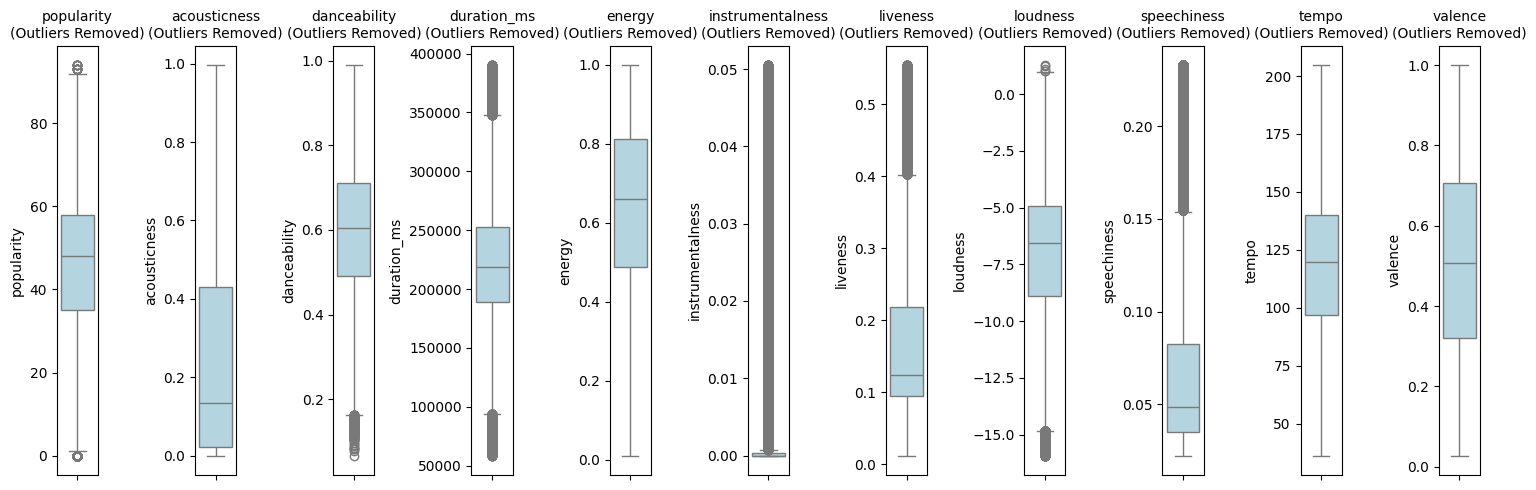

In [6]:
# outlier removal using iqr method
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed using IQR for columns:")
print(list(numeric_cols))

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col}\n(Outliers Removed)', fontsize=10)
    plt.tight_layout()

plt.show()

/tmp/ipython-input-4126041820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='popularity', data=df[df['genre'].isin(top_genres)], palette='Set2')


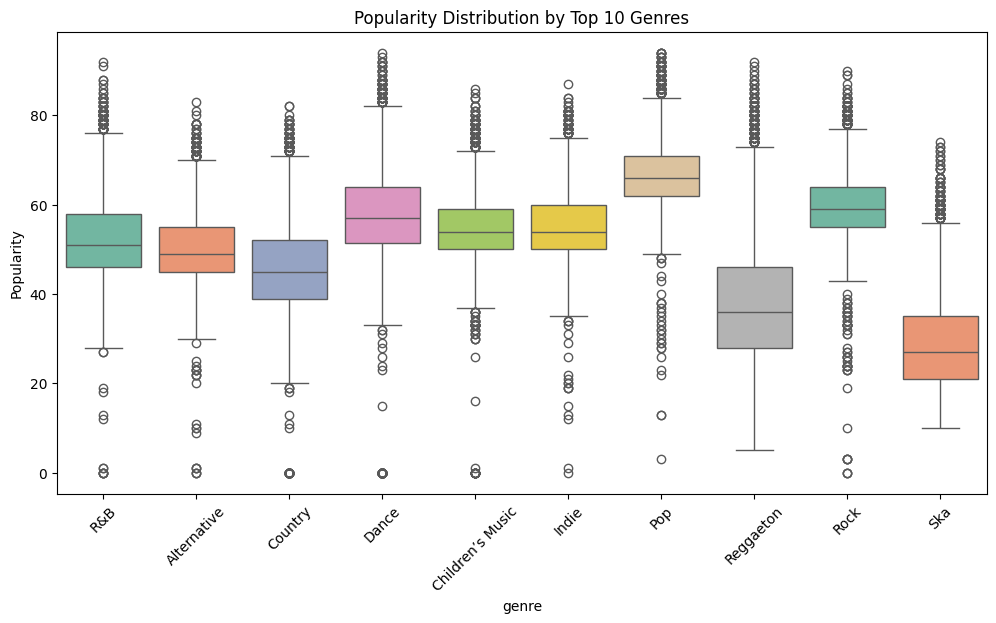

In [7]:
plt.figure(figsize=(12,6))
top_genres = df['genre'].value_counts().head(10).index
sns.boxplot(x='genre', y='popularity', data=df[df['genre'].isin(top_genres)], palette='Set2')
plt.title('Popularity Distribution by Top 10 Genres')
plt.xticks(rotation=45)
plt.ylabel('Popularity')
plt.show()


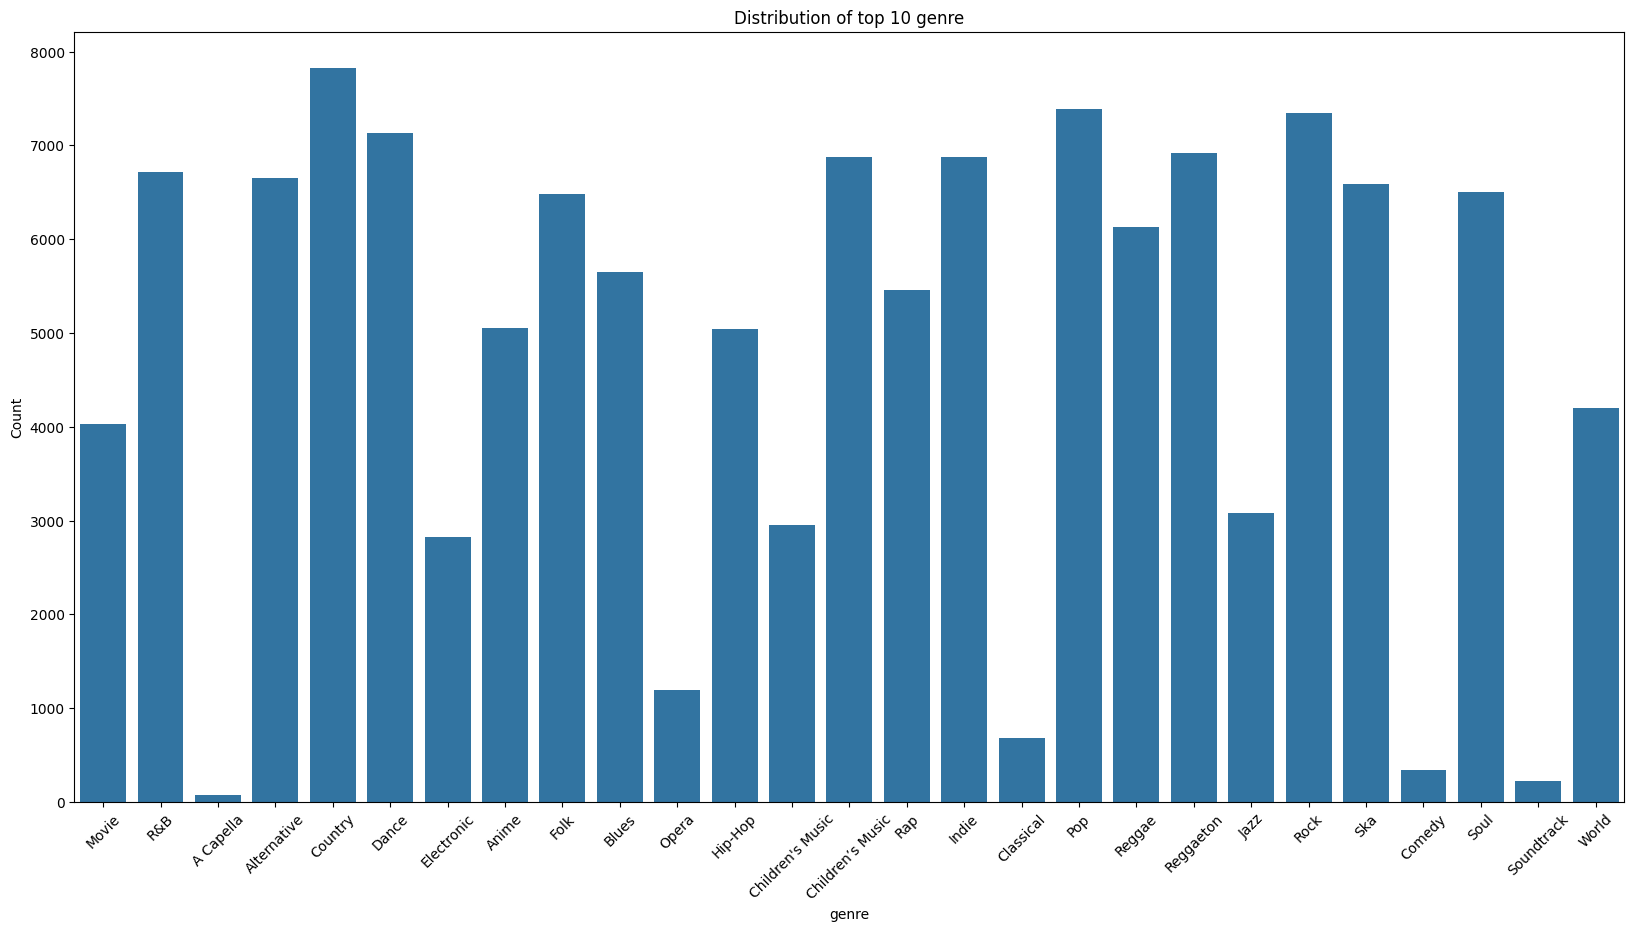

In [8]:
# countplot of top 10 genre
plt.figure(figsize=(20,10))
sns.countplot(x='genre',data=df)
plt.title('Distribution of top 10 genre')
plt.xticks(rotation=45)
plt.xlabel('genre')
plt.ylabel('Count')
plt.show()


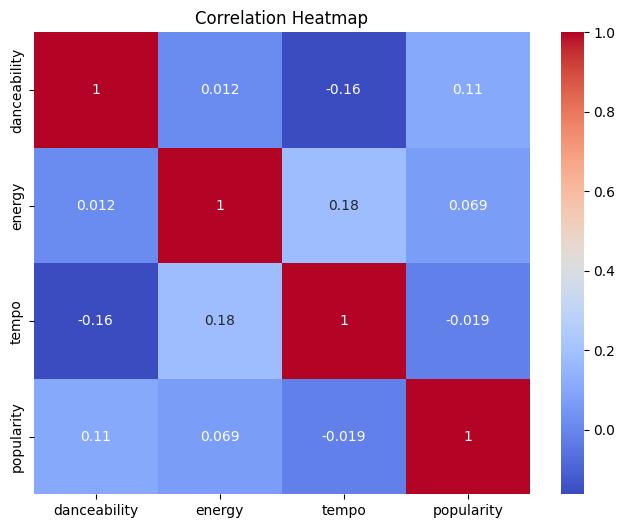

In [9]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['danceability','energy','tempo','popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


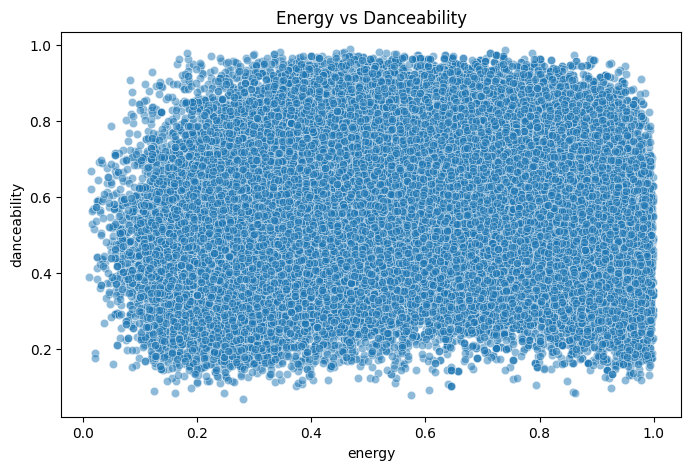

In [10]:
# Scatterplot: Energy vs Danceability
plt.figure(figsize=(8,5))
sns.scatterplot(x='energy', y='danceability', data=df, alpha=0.5)
plt.title('Energy vs Danceability')
plt.show()


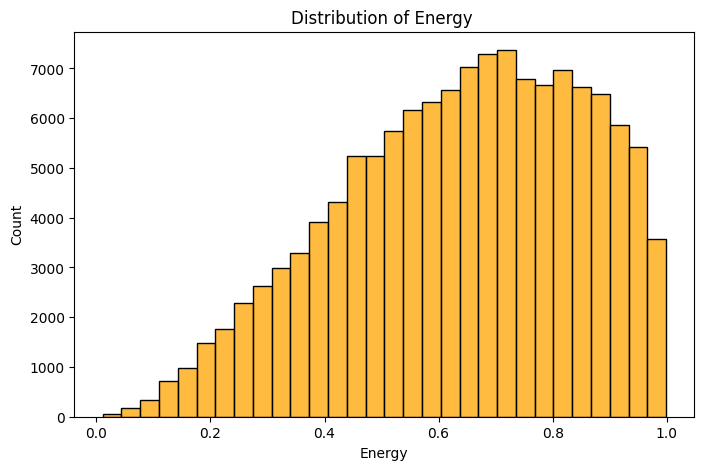

In [11]:
#histogram plot
plt.figure(figsize=(8,5))
sns.histplot(df['energy'], color='orange', bins=30)
plt.title('Distribution of Energy ')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()


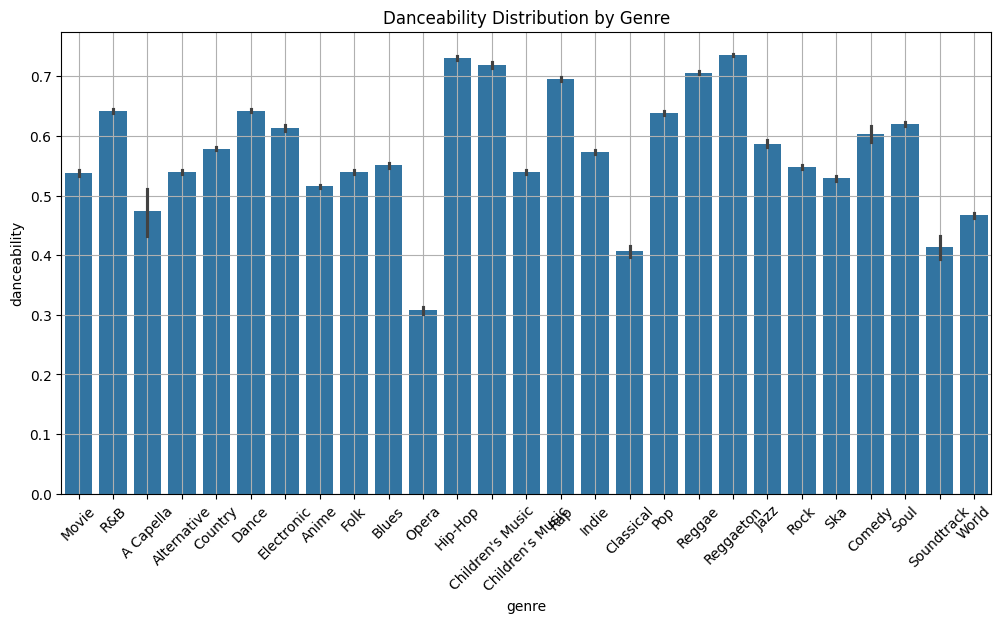

In [12]:
#barlot btw danceabilty vs genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='danceability', data=df)
plt.title('Danceability Distribution by Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



## Insights and Observations

1. The popularity distribution shows that most songs have low to medium popularity, very few songs are extremely popular.
2. Danceability values are mostly between 0.4 and 0.8, some outliers are there.
3. From the heatmap, energy and danceability don't have a strong correlation with popularity, but tempo seems a little independent.
4. Pop genre dominates the dataset, followed by other genres like rap and rock.
5. Scatter plot shows that songs can be high energy but not always high danceability, so they are not directly linked.

This was a simple EDA project done as a beginner in ML. I learnt how to explore data, clean it, and visualize it.
